In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
# prompt: load kaggle.jsonfile as kaggle_credential

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d nirmalsankalana/plant-diseases-training-dataset

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/plant-diseases-training-dataset
License(s): CC0-1.0
100% 5.49G/5.50G [00:57<00:00, 99.5MB/s]
100% 5.50G/5.50G [00:57<00:00, 102MB/s] 


In [6]:
# prompt: unzip the downloaded zip file

with ZipFile('plant-diseases-training-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()


In [7]:
print(os.listdir("data"))

['Tomato___leaf_mold', 'Corn___healthy', 'Sugercane___yellow_leaf', 'Potato___nematode', 'Rice___blast', 'Apple___scab', 'Tomato___spider_mites', 'Tomato___target_spot', 'Potato___healthy', 'Peach___healthy', 'Grape___black_rot', 'Squash___powdery_mildew', 'Strawberry___leaf_scorch', 'Strawberry___healthy', 'Potato___bacterial_wilt', 'Tomato___bacterial_spot', 'Tomato___septoria_leaf_spot', 'Cassava___brown_streak_disease', 'Cherry___healthy', 'Cassava___healthy', 'Rice___brown_spot', 'Tomato___early_blight', 'Peach___bacterial_spot', 'Apple___gray_spot', 'Grape___black_measles', 'Bell_pepper___bacterial_spot', 'Cassava___bacterial_blight', 'Apple___healthy', 'Sugercane___rust', 'Potato___early_blight', 'Sugercane___mosaic', 'Apple___rust', 'Cherry___powdery_mildew', 'Bell_pepper___healthy', 'Tomato___late_blight', 'Apple___brown_spot', 'Grape___leaf_blight', 'Apple___black_rot', 'Raspberry___healthy', 'Potato___pests', 'Blueberry___healthy', 'Grape___healthy', 'Potato___virus', 'Corn_

In [8]:
print(len(os.listdir("data")))

60


number of classes = 60

(256, 256, 3)


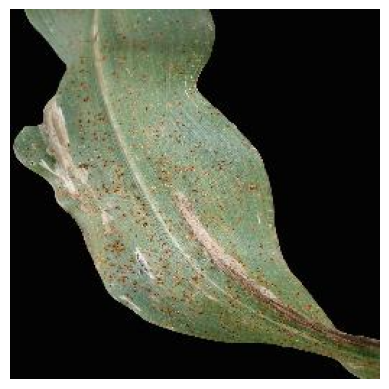

In [10]:
image_path = '/content/data/Corn___common_rust/RS_Rust 1564.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [11]:
# Image Parameters
img_size = 224
batch_size = 32

In [12]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [13]:
#dataset path
base_dir = 'data'

In [14]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 76395 images belonging to 60 classes.


In [15]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 19073 images belonging to 60 classes.


**Concolutional Neural Network**

In [16]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [17]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [18]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
2387/2387 [==============================] - 401s 165ms/step - loss: 1.2976 - accuracy: 0.6337 - val_loss: 1.0422 - val_accuracy: 0.7215
Epoch 2/5
2387/2387 [==============================] - 371s 155ms/step - loss: 0.5611 - accuracy: 0.8110 - val_loss: 1.0669 - val_accuracy: 0.7368
Epoch 3/5
2387/2387 [==============================] - 344s 144ms/step - loss: 0.2920 - accuracy: 0.9001 - val_loss: 1.2351 - val_accuracy: 0.7417
Epoch 4/5
2387/2387 [==============================] - 352s 147ms/step - loss: 0.1318 - accuracy: 0.9568 - val_loss: 1.5626 - val_accuracy: 0.7289
Epoch 5/5
2387/2387 [==============================] - 396s 166ms/step - loss: 0.0864 - accuracy: 0.9733 - val_loss: 1.8997 - val_accuracy: 0.7237


In [20]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
596/596 [==============================] - 75s 126ms/step - loss: 1.8997 - accuracy: 0.7237
Validation Accuracy: 72.37%


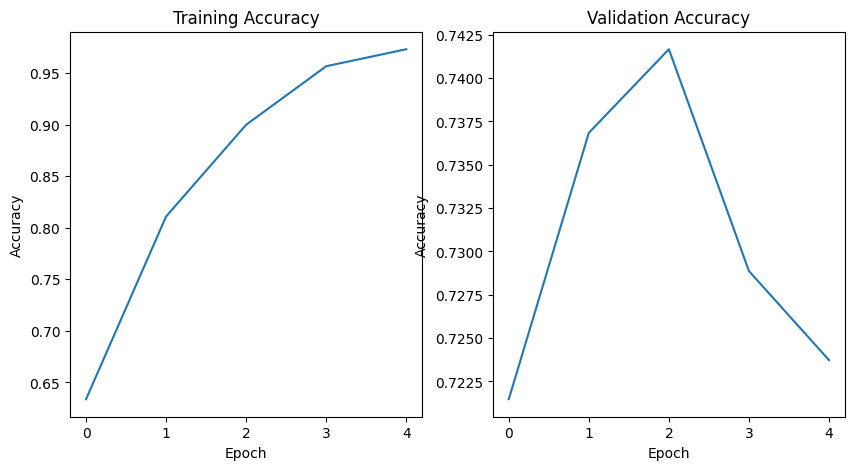

In [21]:
# prompt: plot training and validation accuracy using two graphs

plt.figure(figsize=(10, 5))

# Plot the training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot the validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


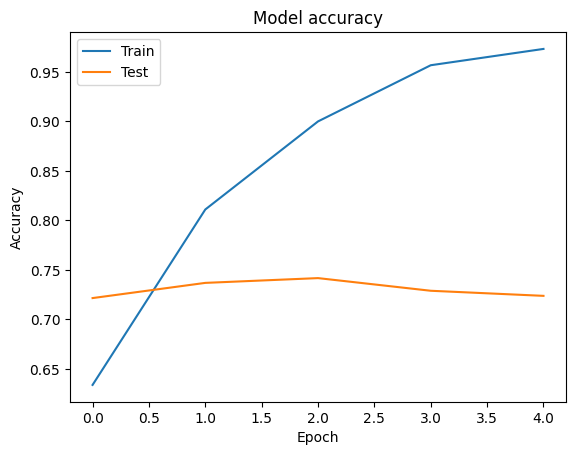

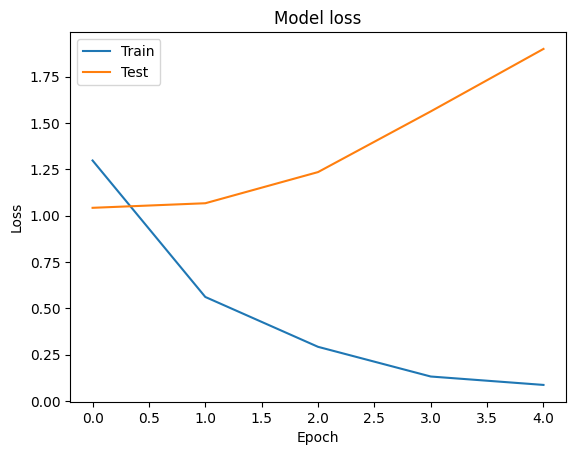

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Building a predictive system**

In [23]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [24]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [25]:
class_indices

{0: 'Apple___alternaria_leaf_spot',
 1: 'Apple___black_rot',
 2: 'Apple___brown_spot',
 3: 'Apple___gray_spot',
 4: 'Apple___healthy',
 5: 'Apple___rust',
 6: 'Apple___scab',
 7: 'Bell_pepper___bacterial_spot',
 8: 'Bell_pepper___healthy',
 9: 'Blueberry___healthy',
 10: 'Cassava___bacterial_blight',
 11: 'Cassava___brown_streak_disease',
 12: 'Cassava___green_mottle',
 13: 'Cassava___healthy',
 14: 'Cassava___mosaic_disease',
 15: 'Cherry___healthy',
 16: 'Cherry___powdery_mildew',
 17: 'Corn___common_rust',
 18: 'Corn___gray_leaf_spot',
 19: 'Corn___healthy',
 20: 'Corn___northern_leaf_blight',
 21: 'Grape___black_measles',
 22: 'Grape___black_rot',
 23: 'Grape___healthy',
 24: 'Grape___leaf_blight',
 25: 'Orange___citrus_greening',
 26: 'Peach___bacterial_spot',
 27: 'Peach___healthy',
 28: 'Potato___bacterial_wilt',
 29: 'Potato___early_blight',
 30: 'Potato___healthy',
 31: 'Potato___late_blight',
 32: 'Potato___nematode',
 33: 'Potato___pests',
 34: 'Potato___phytophthora',
 35: 

In [26]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [29]:
# Example Usage
image_path = '/content/data/Corn___gray_leaf_spot/fadf58aa-98fd-402a-8fdc-d06e250ec265___RS_GLSp 4557.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 27ms/step
Predicted Class Name: Corn___gray_leaf_spot


In [37]:
model.save('/content/trained/PlantDiseasePrediction.h5')

In [38]:
model.save('/content/drive/MyDrive/TrainedMod/PlantDiseasePrediction.h5')